<a href="https://colab.research.google.com/github/jasmineshaik2295/zeta/blob/main/drug_quantity_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
file_path="/content/patient_drag_quantity_data_with_30_features.csv"

In [4]:
df = pd.read_csv(file_path)

In [8]:
print(df.isnull().sum())

Drag Quantity              0
Age                        0
Gender                     0
Height                     0
Weight                     0
Region                     0
Grade Level                0
Num Siblings               0
Parent Health              0
Household Type             0
Asthma History             1
Allergy History            1
Chronic Disease History    1
Family Income              1
Access to Healthcare       1
Mother Education           1
Father Education           1
Num Chronic Conditions     1
Screen Time                1
BMI                        1
Exercise Frequency         1
Diet Quality               1
Sleep Hours                1
Chronic Medication         1
Allergic Medication        1
dtype: int64


In [9]:
df.columns

Index(['Drag Quantity', 'Age', 'Gender', 'Height', 'Weight', 'Region',
       'Grade Level', 'Num Siblings', 'Parent Health', 'Household Type',
       'Asthma History', 'Allergy History', 'Chronic Disease History',
       'Family Income', 'Access to Healthcare', 'Mother Education',
       'Father Education', 'Num Chronic Conditions', 'Screen Time', 'BMI',
       'Exercise Frequency', 'Diet Quality', 'Sleep Hours',
       'Chronic Medication', 'Allergic Medication'],
      dtype='object')

In [10]:
df.head()

,Drag Quantity,Age,Gender,Height,Weight,Region,Grade Level,Num Siblings,Parent Health,Household Type,...,Mother Education,Father Education,Num Chronic Conditions,Screen Time,BMI,Exercise Frequency,Diet Quality,Sleep Hours,Chronic Medication,Allergic Medication
0,3.1629384962319618,18,Female,172.0,45.0,Urban,Grade 1,1.0,1,0,...,Bachelor Degree,High School,3.0,5.395818,15.21,4.0,3.0,8.390627,0.0,0.0
1,1.3763736102191144,17,Female,98.0,51.0,Urban,Grade 5,4.0,1,0,...,Bachelor Degree,High School,2.0,2.712910,53.10,0.0,3.0,5.023669,0.0,1.0
2,3.0113158779156795,9,Male,121.0,51.0,Urban,Grade 6,5.0,1,0,...,Master Degree,Bachelor Degree,2.0,2.907976,34.83,1.0,3.0,6.045291,1.0,0.0
3,2.481288630575192,14,Female,108.0,34.0,Rural,Grade 2,2.0,1,1,...,High School,High School,2.0,5.358511,29.15,0.0,2.0,7.247505,0.0,1.0
4,4.518976505136979,8,Female,132.0,65.0,Urban,Grade 5,4.0,0,0,...,Associate Degree,Associate Degree,1.0,3.529981,37.30,1.0,1.0,7.511407,1.0,1.0


In [11]:
data = df.dropna()

In [13]:
categorical_cols = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [14]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [15]:
data_scaled['Feature_Interaction'] = data_scaled.iloc[:, 0] * data_scaled.iloc[:, 1]

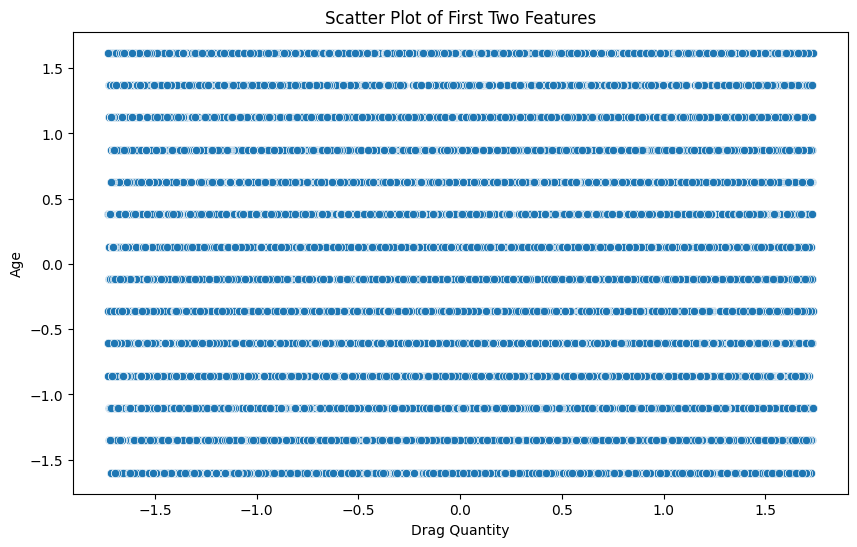

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled.iloc[:, 0], y=data_scaled.iloc[:, 1])
plt.title("Scatter Plot of First Two Features")
plt.show()

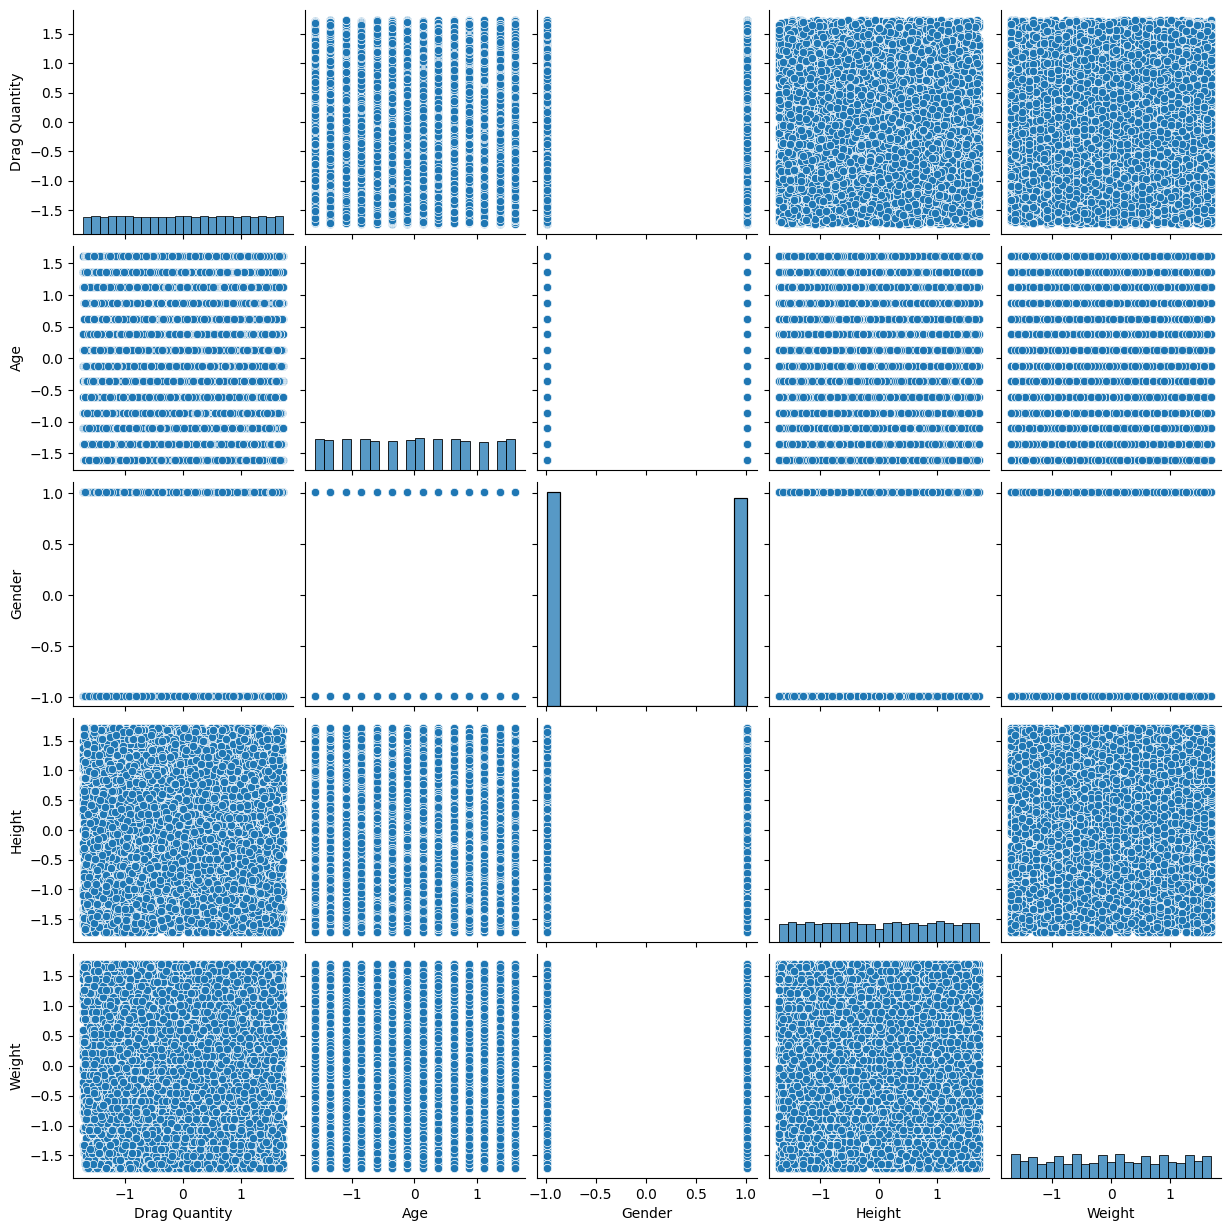

In [17]:
sns.pairplot(data_scaled.iloc[:, :5])  # Pair plot of first 5 features
plt.show()

<Figure size 1000x600 with 0 Axes>

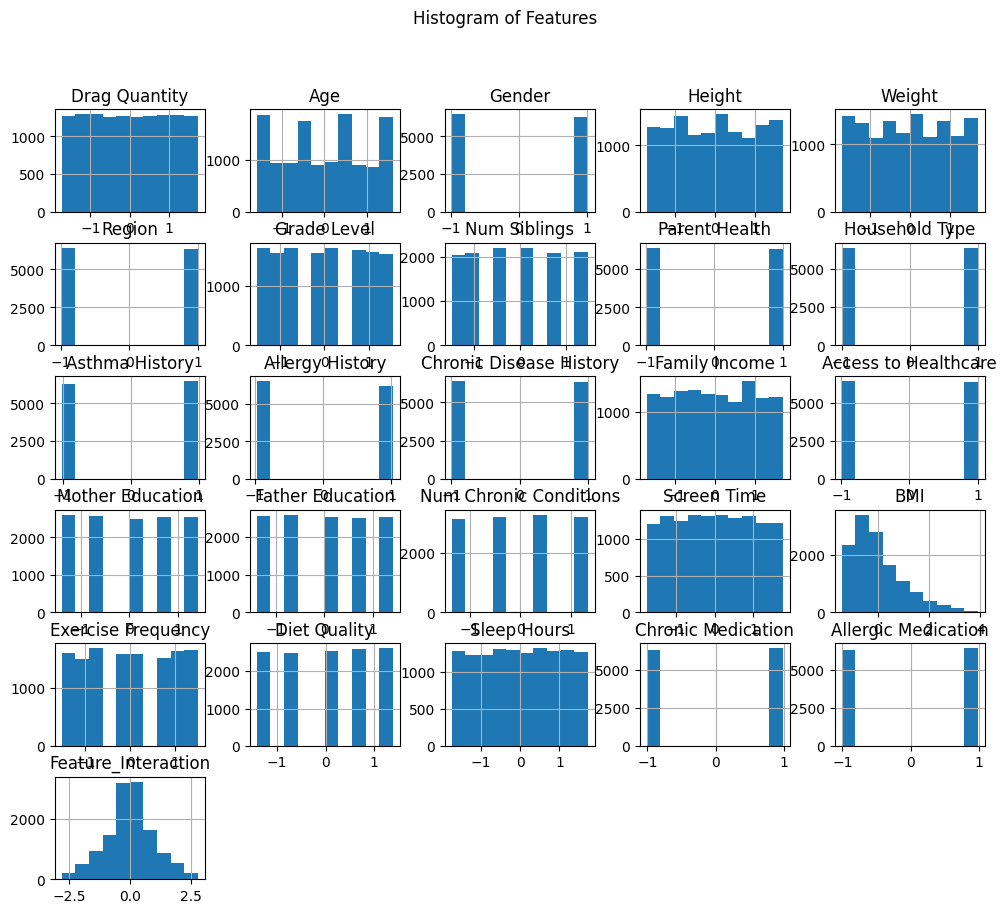

In [18]:
plt.figure(figsize=(10, 6))
data_scaled.hist(figsize=(12, 10))
plt.suptitle("Histogram of Features")
plt.show()

In [20]:
X = data_scaled.drop(columns=[data_scaled.columns[-1]])
y = data_scaled[data_scaled.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Feature Importance Analysis using Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

NameError: name 'RandomForestRegressor' is not defined

In [22]:
# Feature Importance Analysis using Random Forest
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

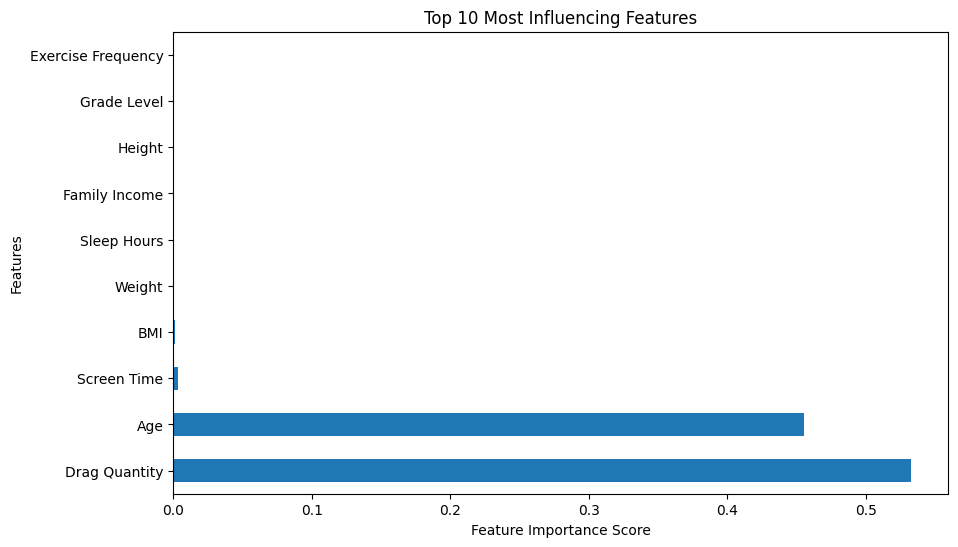

In [23]:
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Most Influencing Features")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()


In [24]:
most_important_feature = feature_importances.idxmax()
print(f"The most influencing feature in the dataset is: {most_important_feature}")

The most influencing feature in the dataset is: Drag Quantity
